# SC2008 Lab 4 Python Code
### By Luar Shui Yan
### Latest: 20/3/24, 2350

# Part 1: Setting Up
## 1.1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

## 1.2. Initialising required dataframes

In [2]:
flow_lst = []
cntr_lst = []

with open('Data_3.csv', 'r') as file:
    for line in file:
        parts = line.strip().split(',')
        
        if parts[0] == 'FLOW':
            flow_lst.append(parts)
        else:
            cntr_lst.append(parts)

df_flow = pd.DataFrame(flow_lst, columns=[f'Column_{i+1}' for i in range(len(flow_lst[0]))])
df_cntr = pd.DataFrame(cntr_lst, columns=[f'Column_{i+1}' for i in range(len(cntr_lst[0]))])

## 1.3. Adding column names for Flow DF

In [3]:
flow_columns = [
    "FLOW",
    "Agent address",
    "inputPort",
    "outputPort",
    "src_MAC",
    "dst_MAC",
    "ethernet_type",
    "in_vlan",
    "out_vlan",
    "src_IP",
    "dst_IP",
    "IP_protocol",
    "ip_tos",
    "ip_ttl",
    "udp_src_port OR tcp_src_port OR icmp_type",
    "udp_dst_port OR tcp_dst_port OR icmp_code",
    "tcp_flags",
    "packet_size",
    "IP_size",
    "sampling_rate"
]

df_flow.columns = flow_columns

## 1.4. Preview data format for Flow

In [4]:
df_flow.head()

,FLOW,Agent address,inputPort,outputPort,src_MAC,dst_MAC,ethernet_type,in_vlan,out_vlan,src_IP,dst_IP,IP_protocol,ip_tos,ip_ttl,udp_src_port OR tcp_src_port OR icmp_type,udp_dst_port OR tcp_dst_port OR icmp_code,tcp_flags,packet_size,IP_size,sampling_rate
0,FLOW,203.30.38.251,137,200,d404ff55fd4d,80711fc76001,0x0800,919,280,130.246.176.22,140.115.32.81,6,0x00,50,51216,23505,0x10,1518,1500,2048
1,FLOW,203.30.38.251,129,193,609c9f851b00,0031466b23cf,0x0800,11,919,155.69.160.32,64.233.188.128,6,0x00,56,23159,80,0x10,74,52,2048
2,FLOW,203.30.38.251,137,200,d404ff55fd4d,80711fc76001,0x0800,919,280,130.246.176.53,140.115.32.83,6,0x00,50,50041,20739,0x10,1518,1500,2048
3,FLOW,203.30.38.251,129,135,609c9f851b00,002688cd5fc7,0x0800,11,919,155.69.160.32,54.169.174.79,17,0x00,120,54241,26510,0x10,116,94,2048
4,FLOW,203.30.38.251,130,199,00239cd087c1,544b8cf9a7df,0x0800,919,600,137.132.228.15,193.62.192.8,6,0x00,56,53923,34262,0x10,70,52,2048


## 1.5. Preview data format for Cntr

In [5]:
df_cntr.head()

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_12,Column_13,Column_14,Column_15,Column_16,Column_17,Column_18,Column_19,Column_20,Column_21
0,CNTR,203.30.38.251,193,6,10000000000,1,3,331739894262631,1096552455,0,...,0,0,0,195472059998801,3470223923,365983,68459,0,0,1
1,CNTR,203.30.38.251,194,6,10000000000,1,3,1029401630101,1296902697,50964,...,0,0,0,25600365343637,2831863561,267148,49673,0,0,1
2,CNTR,203.30.38.251,195,6,10000000000,1,3,6099903806965,550333140,20456354,...,0,0,0,54182111257408,3575896282,119141740,1886187,0,0,1
3,CNTR,203.30.38.251,199,6,10000000000,1,3,133635477763244,554250213,2714002,...,0,2,0,213758315530283,2868675645,102041641,333579,0,0,1
4,CNTR,203.30.38.251,200,6,10000000000,1,3,333311443428067,2261357826,23234590,...,0,0,0,76025027462091,2456890204,90273054,5340516,0,0,1


# Part 2: Answering Questions
## 2.1. Top 5 Talkers

In [6]:
top_src_IPs = df_flow['src_IP'].value_counts().head(5)
top_src_IPs = top_src_IPs.reset_index()
top_src_IPs.columns = ["SRC IP", "Count"]

top_src_IPs

,SRC IP,Count
0,193.62.192.8,3041
1,155.69.160.32,2975
2,130.14.250.11,2604
3,14.139.196.58,2452
4,140.112.8.139,2056


## 2.2. Top 5 Listeners

In [7]:
top_dst_IPs = df_flow['dst_IP'].value_counts().head(5)
top_dst_IPs = top_dst_IPs.reset_index()
top_dst_IPs.columns = ["DST IP", "Count"]

top_dst_IPs

,DST IP,Count
0,103.37.198.100,3841
1,137.132.228.15,3715
2,202.21.159.244,2446
3,192.101.107.153,2368
4,103.21.126.2,2056


## 2.3. Top 5 Applications

In [8]:
top_apps = df_flow['udp_dst_port OR tcp_dst_port OR icmp_code'].value_counts().head(5)
top_apps = top_apps.reset_index()
top_apps.columns = ["Port", "Count"]

top_apps

,Port,Count
0,443,13423
1,80,2647
2,52866,2068
3,45512,1356
4,56152,1341


## 2.4. Total Traffic

In [9]:
df_flow['IP_size'] = pd.to_numeric(df_flow['IP_size'])
total_packet_size = df_flow.loc[df_flow.iloc[:, 0] == "FLOW", "IP_size"].sum() *2048/ (1024**2)

print(f"Total traffic: {total_packet_size: .3f} MB")

Total traffic:  126519.184 MB


## 2.5. Proportion of TCP and UDP

In [10]:
TCP_UDP_counts = df_flow['IP_protocol'].value_counts().head(5)
TCP_UDP_counts = TCP_UDP_counts.reset_index()
TCP_UDP_counts.columns = ["Protocol", "Count"]

TCP_UDP_counts

,Protocol,Count
0,6,56064
1,17,9462
2,50,1698
3,47,657
4,41,104


In [11]:
total = TCP_UDP_counts['Count'].sum()
TCP_UDP_counts['Percentage'] = round((TCP_UDP_counts['Count'] / total) * 100, 1)

TCP_UDP_counts

,Protocol,Count,Percentage
0,6,56064,82.5
1,17,9462,13.9
2,50,1698,2.5
3,47,657,1.0
4,41,104,0.2


## 2.6. Top 5 Communication Pairs

In [12]:
pair_counter = Counter()
column_combinations = combinations(['src_IP', 'dst_IP'], 2)

for col1, col2 in column_combinations:
    pairs_count = df_flow.groupby([col1, col2]).size()
    pair_counter.update(dict(pairs_count))

top_5_pairs = pair_counter.most_common(5)

print("Top 5 pairs of attributes:")
for pair, count in top_5_pairs:
    print(f"Pair: {pair}, Count: {count}")


Top 5 pairs of attributes:
Pair: ('193.62.192.8', '137.132.228.15'), Count: 3041
Pair: ('130.14.250.11', '103.37.198.100'), Count: 2599
Pair: ('14.139.196.58', '192.101.107.153'), Count: 2368
Pair: ('140.112.8.139', '103.21.126.2'), Count: 2056
Pair: ('137.132.228.15', '193.62.192.8'), Count: 1910


## 2.7. Visualise Communication between IP Hosts

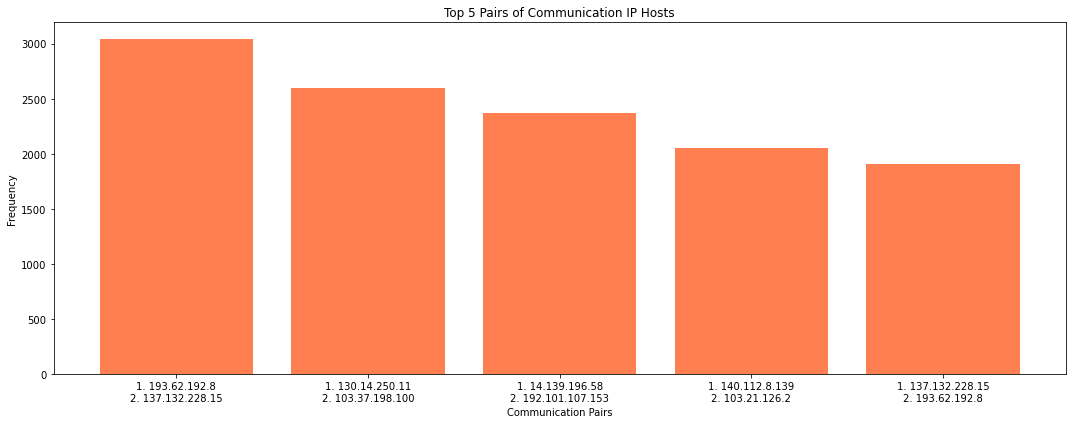

In [13]:
pairs = [pair for pair, count in top_5_pairs]
counts = [count for pair, count in top_5_pairs]

plt.figure(figsize=(15, 6))
plt.bar(range(len(pairs)), counts, width=0.8, tick_label=[f'1. {pair[0]}\n2. {pair[1]}' for pair in pairs], color='coral')

plt.xlabel('Communication Pairs')
plt.ylabel('Frequency')
plt.title('Top 5 Pairs of Communication IP Hosts')

plt.tight_layout()
plt.show()